This project is to build a network graph of the kindle books that are in the file:
C:\Users\Kryz\Desktop\Books\Kindle Books\[Index.xlsx]Sheet1

The first step is to read in the csv and pass out the text for a goodreads search

In [ ]:
import csv
import string
import re

blist=[]

with open('C:/Users/Kryz/Desktop/Books/Kindle Books/Books.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        #print(f'\t{row[0]}')
        blist.append(row)
        
    #print(blist)

x = len(blist)
print(x)

blist2=[]
for i in range(len(blist)):
    strip = blist[i][0]
    strip2 = strip.translate(str.maketrans('','',string.punctuation))
    strip2 = strip2.replace('mobi',' ')
    strip2 = strip2.replace('Copy',' ')
    strip2 = re.sub('^[0-9]+', '', strip2)
    blist2.append(strip2)

print(blist2)        

###This gives me the list of books in the list blist2#######

Now I want to pass elements of the list into the goodreads search bar and return the similar books

In [ ]:
#import packages
import sys
!conda install --yes --prefix {sys.prefix} selenium
import selenium
# Using Chrome to access web
from selenium import webdriver
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as ec
from selenium.common.exceptions import (
    TimeoutException, NoSuchElementException, StaleElementReferenceException, WebDriverException
)
from selenium.webdriver.chrome.options import Options
from urllib.request import urlopen
from bs4 import BeautifulSoup

import re
import numpy as np
import pandas as pd

In [ ]:


#Opens Goodreads and logs on
email = 'kryz.wosik@gmail.com'
password = 'Lisa2104'

options = Options()
options.headless = True
driver = webdriver.Chrome(options=options)

driver.get('https://www.goodreads.com/')
driver.find_element_by_id("userSignInFormEmail").send_keys(email)
driver.find_element_by_id("user_password").send_keys(password)
driver.find_element_by_class_name("gr-button--dark").submit()


In [ ]:
#Actual Module
o_lst=[]
url_lst=[]
title_lst=[]
id_lst=[]
author_lst=[]
count=0
for d in blist2[1:]:
    o_lst.append(d)
    id_box = driver.find_element_by_name('q')
    id_box.send_keys(d)
    id_box.send_keys(u'\ue007')
    count = count + 1
    print(count)
    try:
        element=driver.find_element_by_class_name("bookTitle")
        driver.find_element_by_class_name("bookTitle").send_keys('\n')
        url = driver.current_url
        url_html = urlopen(url)
        html2 = BeautifulSoup(url_html, 'html.parser')
        title = html2.find("h1", {"id": "bookTitle"}).text.strip()
        author = html2.find("a", {"class": "authorName"}).text.strip()
        idls = re.findall('\d+',url)
        id = int(idls[0])    
        url_lst.append(url)
        title_lst.append(title)
        author_lst.append(author)
        id_lst.append(id)    
    except NoSuchElementException:      
        url_lst.append("Error")
        title_lst.append("Error")
        author_lst.append("Error")
        id_lst.append("Error")

#print(o_lst)
#print(url_lst)
#print(title_lst)
#print(author_lst)
#print(id_lst)


data = pd.DataFrame(np.column_stack([o_lst,url_lst, title_lst, author_lst,id_lst]), 
                               columns=['orig','url', 'title', 'author','id'])
#print(data)

data.to_csv('kg.csv', index=False, header=True)



In [ ]:
print(len(o_lst))
print(len(url_lst))
print(len(title_lst))
print(len(author_lst))
print(len(id_lst))

data = pd.DataFrame(np.column_stack([o_lst[0:2671],url_lst, title_lst, author_lst,id_lst]), 
                               columns=['orig','url', 'title', 'author','id'])
#print(data)

data.to_csv('kg.csv', index=False, header=True)

#data.to_csv('kg.csv', index=False, header=True)

In [ ]:
#Now we'll start to use the API's
api_key='ph7Doc3hJwRmaaCpscPg'
api_secret='69M5pLe6UXEL6n1MVWxDWeQ2TAGad2YvVIVHRgcHos'

print(api_key)
print(api_secret)


#importing packages to this installation
import sys
!conda install --yes --prefix {sys.prefix} xmltodict
import sys
!conda install --yes --prefix {sys.prefix} requests
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install rauth
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install goodreads
import sys
!{sys.executable} -m pip install requests-html


In [ ]:
##just getting the list from the csv....
import csv
import string
import re
id_lst=[]

with open('C:/Users/Kryz/kg.csv',encoding="utf8") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        idx = row[4]
        #print(idx)
        if idx != "Error":
            id_lst.append(idx)

        
#print(header)      
print(id_lst)
print(len(id_lst))
        


In [105]:
#use requests to get book details based on id
#id_lst=[3431,6900,1934,6656,7494887,42389,49251,46306,3873,46756,78433,6080337,6969,45032,50398,2156,1885,14935]


#print(id_lst)
from goodreads import client
gc = client.GoodreadsClient(api_key,api_secret)

d1 = {}
for id in id_lst[1:100]:
    str_ls=[]
    try:
        book = gc.book(id)
        books = str(book)
        similar = book.similar_books
        similar_small = similar[0:10]
        #print(books)
        #print(similar_small)
        for s in similar_small:
            str_b = str(s)
            #print(str_b)
            str_ls.append(str_b)
            #print(str_ls)
            d1.update({books:str_ls})
    except:
        pass

print(d1)


{'The Five People You Meet in Heaven': ['Harry Potter and the Deathly Hallows (Harry Potter, #7)', 'Lord of the Flies', 'A Wrinkle in Time (Time Quintet, #1)', 'Speak', "The Handmaid's Tale", "Where'd You Go, Bernadette", 'White Oleander', 'Anna Karenina', 'Miles to Go (The Walk, #2)', 'Sherlock Holmes: The Complete Novels and Stories, Volume  #2'], 'Tuesdays with Morrie': ['Harry Potter and the Deathly Hallows (Harry Potter, #7)', 'Lord of the Flies', 'Speak', 'Anna Karenina', 'A Wrinkle in Time (Time Quintet, #1)', "The Handmaid's Tale", 'White Oleander', "Chicken Soup for the Writer's Soul: Stories to Open the Heart and Rekindle the Spirit of Writers", "Ten Things I Wish I'd Known--Before I Went Out Into the Real World", 'The Prophet'], 'Little Women': ['Harry Potter and the Deathly Hallows (Harry Potter, #7)', 'Lord of the Flies', 'A Wrinkle in Time (Time Quintet, #1)', 'Anna Karenina', "Through the Looking-Glass and What Alice Found There (Alice's Adventures in Wonderland, #2)", "

In [ ]:
test = id_lst[13]
print(test)
book = gc.book(id)
books = str(book)
similar = book.

print(book)
print(books)
#print(similar)

In [ ]:
type(similar)

t_var = similar[0]

type(t_var)
s_var = str(t_var)
type(s_var)
print(s_var)


In [106]:
import re
import numpy as np
import pandas as pd

output = []
for key in d1:
    # iterate through set
    for i in d1[key]:
        output.append((key, i))
#print(output)




In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [50,50]


In [ ]:

nx.draw_networkx_nodes(G, pos,
                       nodelist=str_ls[1:],
                       node_color='r',
                       node_size=500,
                       alpha=0.8)
nx.draw_networkx_nodes(G, pos,
                       nodelist=blist2[1:],
                       node_color='b',
                       node_size=500,
                       alpha=0.8)

# edges
#nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_edges(G, pos,
                       edgelist=elist,
                       width=8, alpha=0.5, edge_color='r')
plt.show()

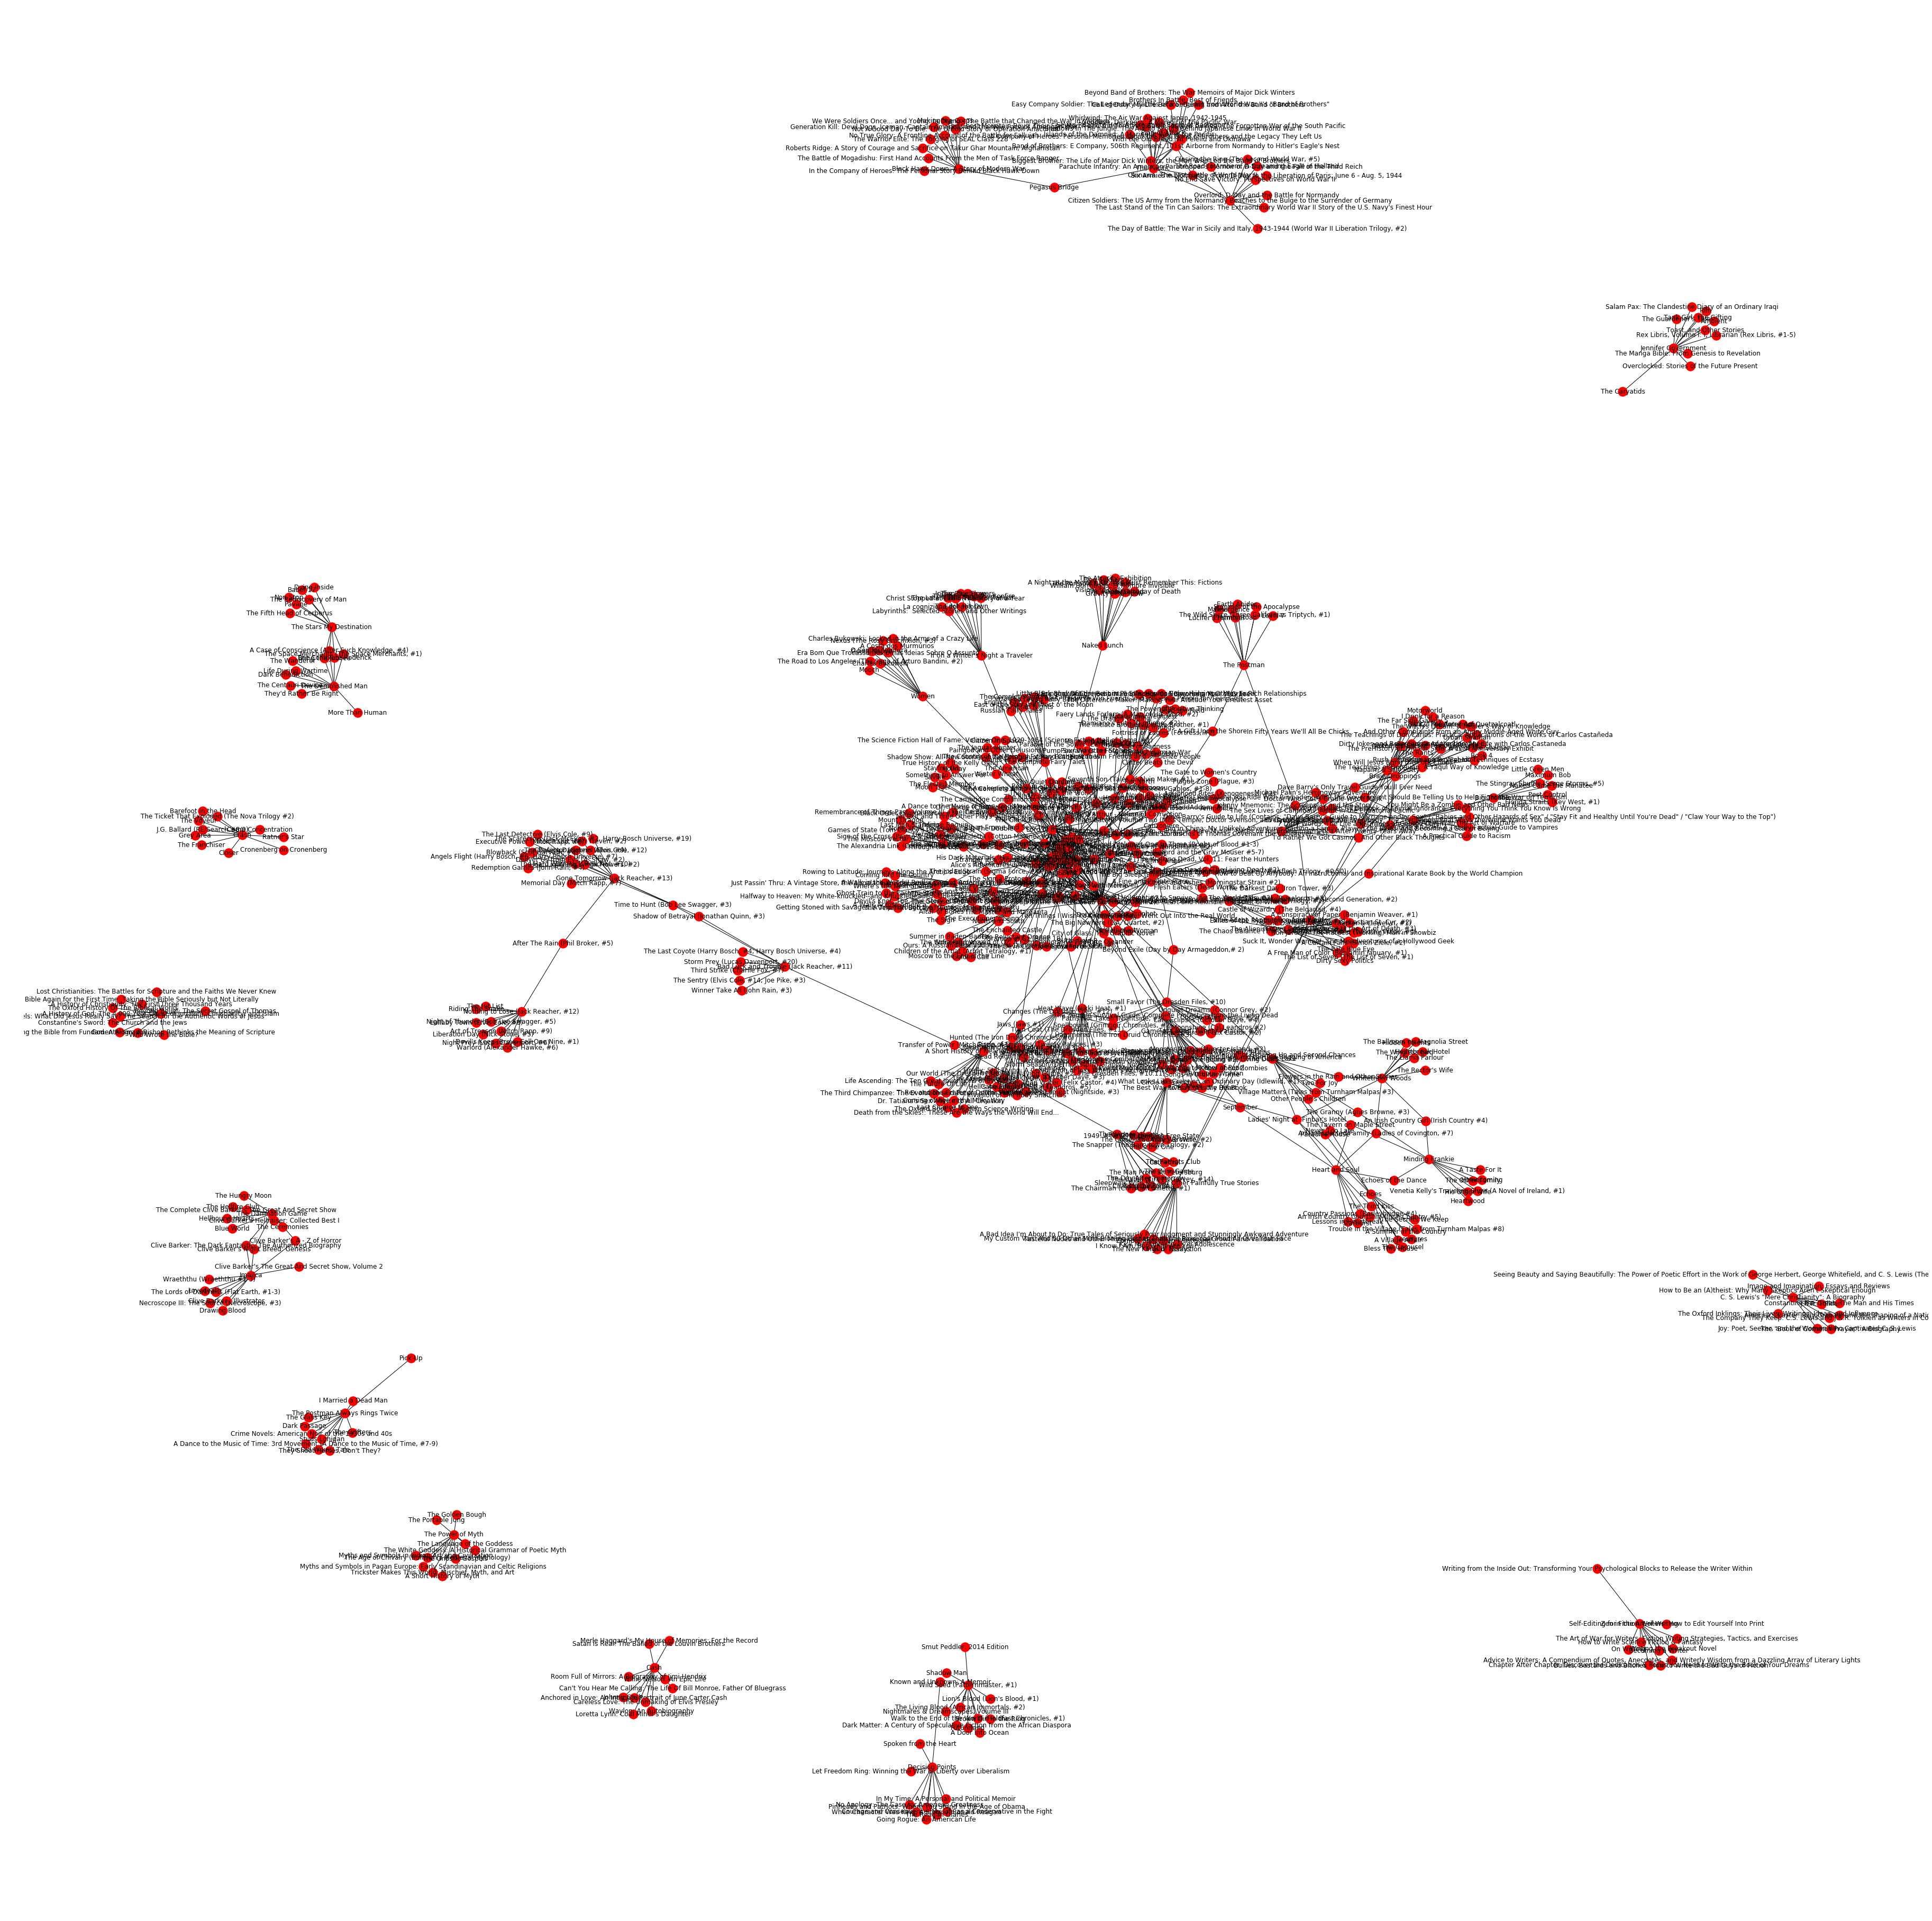

In [107]:
G = nx.from_dict_of_lists(d1)
#G = nx.from_pandas_edgelist(df2)
#G = nx.Graph(output)
#G.nodes
#elist = list(G.edges)
#print(elist)
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, with_labels = True)


In [ ]:
#Communities within the graph
comp = girvan_newman(G)



In [109]:


degree=degree_centrality =nx.degree_centrality(G)
#print(degree_centrality)
df=pd.DataFrame.from_dict(degree, orient='index',columns = ['B'])
df.sort_values(by=['B'])
df.to_csv('C:/Users/Kryz/df2.csv', encoding='utf-8')

In [ ]:
print(len(output))
A = nx.Graph()
A.add_node('The Five People You Meet in Heaven')
A.add_node('Harry Potter and the Deathly Hallows (Harry Potter, #7)')
A.add_node('Tuesdays with Morrie')
A.add_edge('The Five People You Meet in Heaven','Harry Potter and the Deathly Hallows (Harry Potter, #7)')
A.add_edge('Tuesdays with Morrie','Harry Potter and the Deathly Hallows (Harry Potter, #7)')

nx.draw_networkx(A, with_labels=True)

In [ ]:
nx.__version__

In [ ]:
pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G,pos,
                       nodelist=[0, 1, 2, 3],
                       node_color='r',
                       node_size=500,
                       alpha=0.8)